In [1]:
import requests #网络请求
import json #json数据处理

In [2]:
base_url = "https://restapi.amap.com/v5/place/text?" # 基础的URL
key = "*************" # 高德开发平台申请的key
types = "" # POI的类型（在POI分类码表中查找）
region = "" # 爬取的区域（城市或区域代码，如需严格限制召回数据在区域内，要搭配使用city_limit参数）
city_limit = "true" # 默认为false
page_size = "25" # 当前分页展示的数据条数（1-25）
page_num = "" # 请求第几分页(1-100)

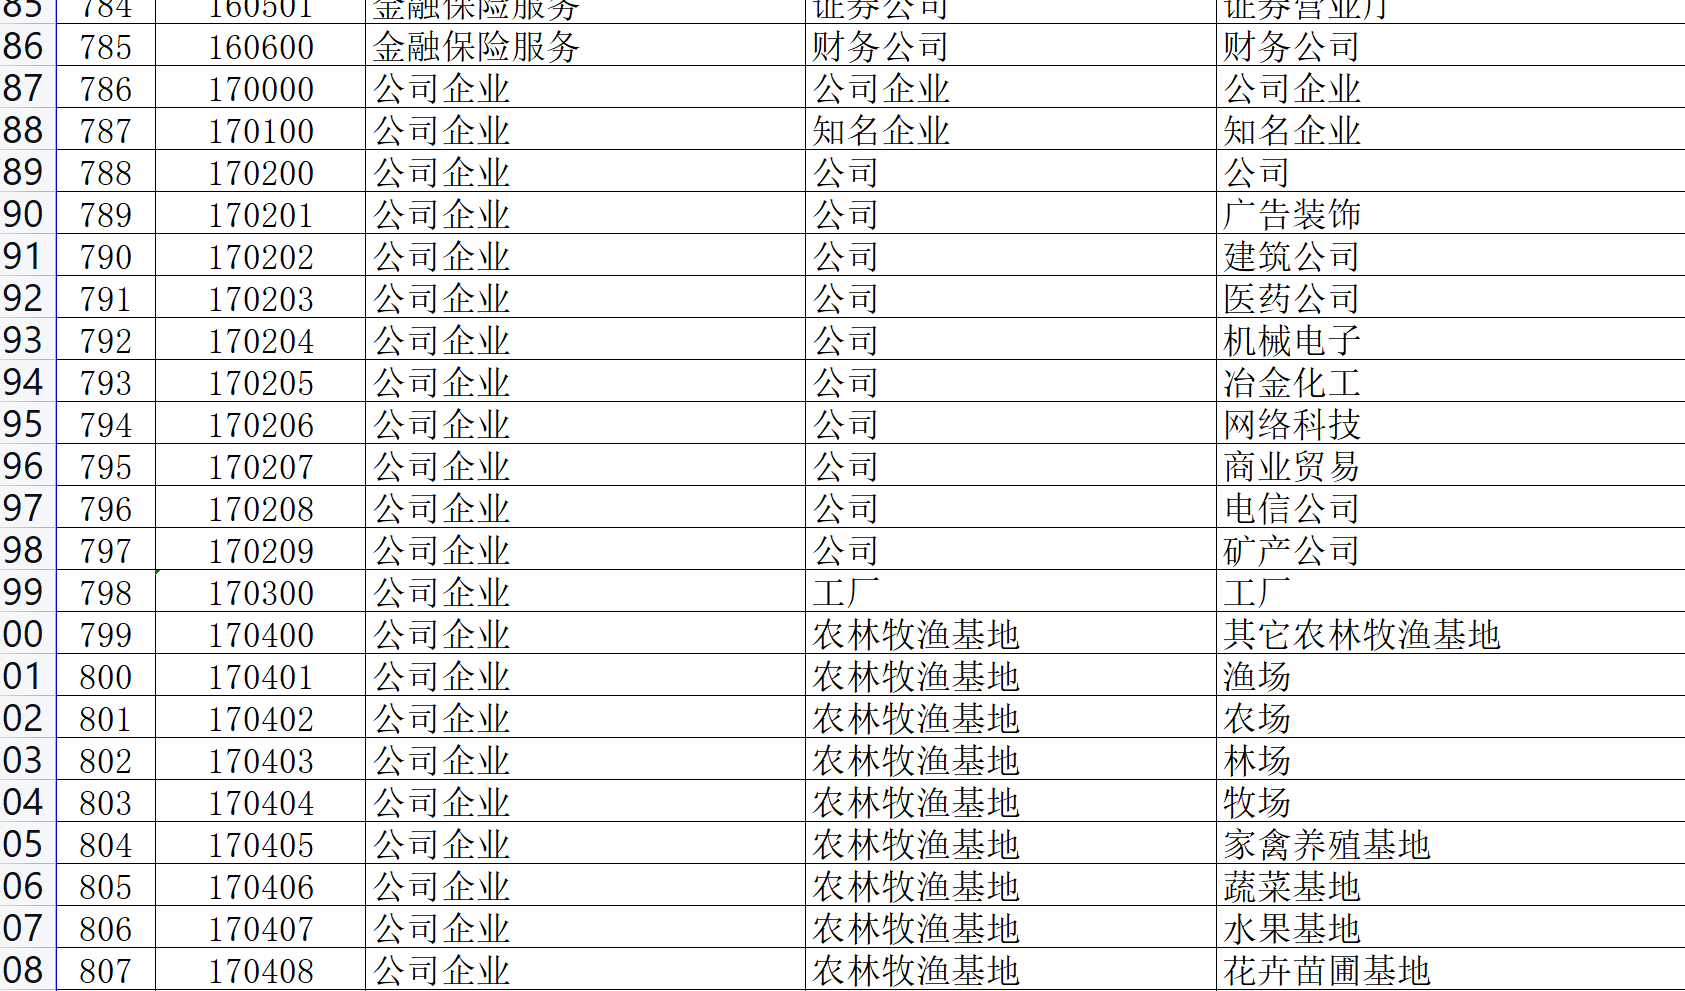

In [3]:
firm_types = [170202, 170203, 170204, 170205, 170209, 170300, 170400, 170401, 
         170402, 170405, 170407, 170408] # 企业类型的编码列表
regions = [440507, 440511, 440512, 440513, 440514, 440515, 440523] # 汕头市各区行政区划编码列表

In [18]:
# 定义获取POI的函数
def get_poi(firm_type, region, page_num):
    # 构建获取poi数据的URL
    url = base_url + f"key={key}&types={firm_type}&region={region}&city_limit={city_limit}&page_size={page_size}&page_num={page_num}" 
    r = requests.get(url)
    return r.text

In [23]:
# 定于解析json数据的函数
def json_parse(resp):
    dicts = json.loads(resp)
    pois = dicts["pois"]
    info = []
    for item in pois:
        info.append((item["name"], item["location"], item["type"], item["adname"], item["address"]))
    return dicts["count"], info

In [26]:
import pandas as pd #表格数据处理

In [35]:
# 因为高德地图每次最多只能爬取900条POI数据，为了数据的完整，需要分类型分区域循环爬取
for tp in firm_types:
    rg_list = []
    for rg in regions:
        pn_list = []
        for pn in range(1,100):
            resp = get_poi(tp, rg, pn)
            count, poi = json_parse(resp)
            if count == '0':
                break
            else:
                pn_list.extend(poi) # 所有页面的POI
        rg_list.extend(pn_list) # 所有区域的POI
    # 将这个类型的POI列表转为表格并储存为csv文件
    df_poi = pd.DataFrame(rg_list)
    df_poi.columns = ["name", "location", "type", "adname", "address"]
    df_poi.to_csv(f"{tp}.csv")